# Laboratorio 5 - Autocodificadores

## Preparación de Datos

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
# 1.1 Cargue los datos en un DataFrame de Pandas.
data = pd.read_csv('UK_foods.csv')
food_names = data['Unnamed: 0']  # Guardamos los nombres de los alimentos.
data = data.drop(columns=['Unnamed: 0'])  # Eliminamos la columna de nombres de alimentos para la normalización.

# 1.2 Realice una exploración básica de los datos (estadísticas descriptivas).
data_description = data.describe()

# 1.3 Normalice los datos, si es necesario.

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data).astype(np.float32)

# Mostrar los resultados
print("1.1 Datos cargados en un DataFrame de Pandas:")
print(data.head())
print("\n1.2 Estadísticas descriptivas de los datos:")
print(data_description)


1.1 Datos cargados en un DataFrame de Pandas:
   England  Wales  Scotland  N.Ireland
0      105    103       103         66
1      245    227       242        267
2      685    803       750        586
3      147    160       122         93
4      193    235       184        209

1.2 Estadísticas descriptivas de los datos:
           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000


## Construcción del Autocodificador

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7672 - val_loss: 1.4449
Epoch 2/100
1/1 [==============================] - 0s 44ms/step - loss: 0.7649 - val_loss: 1.4399
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 0.7624 - val_loss: 1.4348
Epoch 4/100
1/1 [==============================] - 0s 39ms/step - loss: 0.7599 - val_loss: 1.4296
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.7573 - val_loss: 1.4242
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 0.7548 - val_loss: 1.4187
Epoch 7/100
1/1 [==============================] - 0s 40ms/step - loss: 0.7521 - val_loss: 1.4130
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 0.7493 - val_loss: 1.4072
Epoch 9/100
1/1 [==============================] - 0s 41ms/step - loss: 0.7465 - val_loss: 1.4013
Epoch 10/100
1/1 [==============================] - 0s 49ms/step - loss: 0.7435 - val_loss: 1.3952
Epoch 11/100
1/1 [===

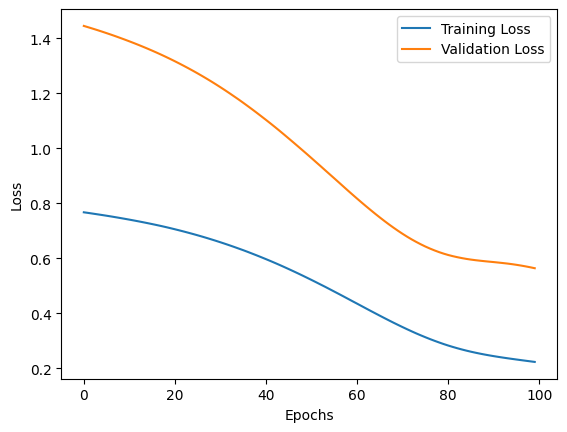

1/1 [==============================] - 0s 90ms/step


array([[-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [ 0.7288991 ,  0.6422688 ,  0.43461847,  0.21104765],
       [-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [ 0.8800768 ,  0.77921426,  0.53211594,  0.26668203],
       [-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [-0.04601071, -0.059689  , -0.06513613, -0.07412399],
       [-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [ 1.3713812 ,  1.2242658 ,  0.8489676 ,  0.44748506],
       [ 2.972469  ,  2.674623  ,  1.881541  ,  1.0366954 ],
       [-0.13892348, -0.14372744, -0.1220386 , -0.10937479],
       [ 3.006031  ,  2.7050254 ,  1.9031858 ,  1.0490464 ],
       [-0.07559564, -0.08648872, -0.08421604, -0.08501142],
       [-0.13892348, -0.

In [16]:
# 2.1 Utilizar todas las observaciones para entrenar el modelo.
X_train = data_normalized

# 2.2 Definir la arquitectura del autocodificador.
input_dim = X_train.shape[1]
encoding_dim = 2  # Reducir a 2 dimensiones en el cuello de botella.

autoencoder = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(input_dim)
])

# 2.3 Compilar y entrenar el modelo.
autoencoder.compile(optimizer='adam', loss='mse')  # Utilizamos la pérdida de error cuadrático medio (MSE).

history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.2)

# 2.4 Evaluar el rendimiento del autocodificador.
loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la pérdida durante el entrenamiento.
import matplotlib.pyplot as plt

plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Las dimensiones reducidas del conjunto de datos
encoded_data = autoencoder.predict(X_train)
encoded_data

# Reducción de Dimensionalidad y Visualización

1/1 [==============================] - 0s 29ms/step


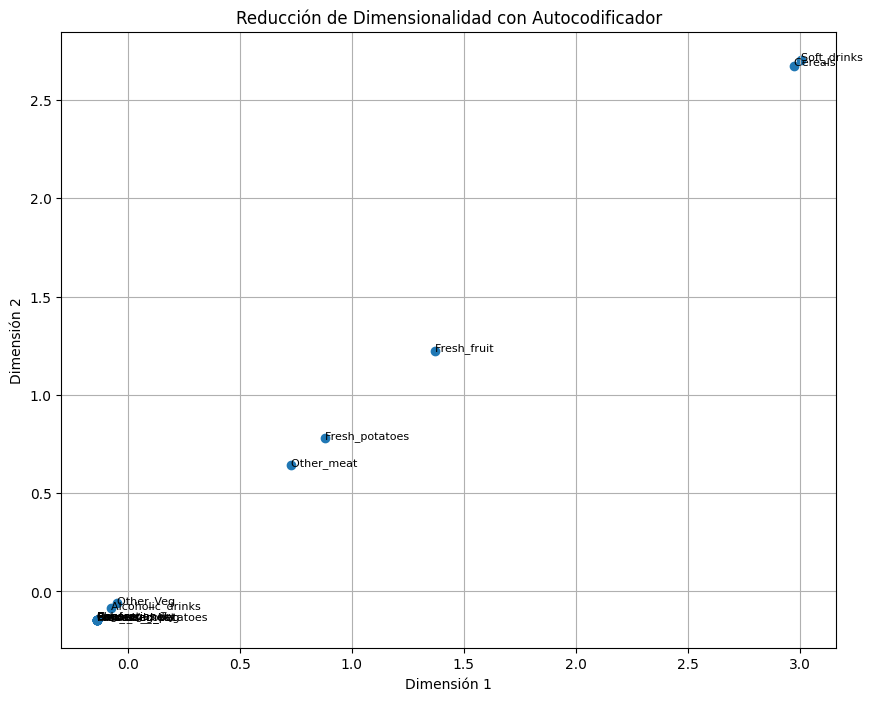

In [22]:
import matplotlib.pyplot as plt

# 3.1 Utilizar el autocodificador para reducir las dimensiones del conjunto de datos a 2.
encoded_data = autoencoder.predict(X_train)

# 3.2 Visualizar las dos dimensiones en un gráfico de dispersión.
plt.figure(figsize=(10, 8))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])

# Etiquetar los puntos con los nombres de los alimentos.
for i, food_name in enumerate(food_names):
    plt.annotate(food_name, (encoded_data[i, 0], encoded_data[i, 1]), fontsize=8)

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Reducción de Dimensionalidad con Autocodificador')
plt.grid(True)
plt.show()